In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [2]:
dcdata = pd.ExcelFile('DoubleClick.xls')
dcsheet = pd.read_excel(dcdata, 'DoubleClick')

In [3]:
dcsheet.head()

,Publisher ID,Publisher Name,Keyword ID,Keyword,Match Type,Campaign,Keyword Group,Category,Bid Strategy,Keyword Type,...,Click Charges,Avg. Cost per Click,Impressions,Engine Click Thru %,Avg. Pos.,Trans. Conv. %,Total Cost/ Trans.,Amount,Total Cost,Total Volume of Bookings
0,K2615,Yahoo - US,43000000039657988,fly to florence,Advanced,Western Europe Destinations,Florence,uncategorized,NaN,Unassigned,...,2.3125,2.312500,11,9.090909,1.272727,900.000000,0.256944,8777.95,2.3125,9
1,K2615,Yahoo - US,43000000039651113,low international airfare,Advanced,Geo Targeted DC,Low International DC,uncategorized,NaN,Unassigned,...,0.6250,0.625000,6,16.666667,1.000000,100.000000,0.625000,1574.20,0.6250,1
2,K2003,MSN - Global,43000000019452431,air discount france ticket,Broad,Air France Brand & French Destinations,France,uncategorized,Position 2-5 Bid Strategy,Unassigned,...,0.3875,0.387500,9,11.111111,1.111111,100.000000,0.387500,390.15,0.3875,1
3,K1175,Google - Global,43000000005663331,[airfrance],Exact,Air France Global Campaign,Air France,airfrance,Position 1- 3,Unassigned,...,2.3125,0.039195,401,14.713217,2.000000,3.389831,1.156250,1665.15,2.3125,2
4,K1123,Overture - Global,43000000005421354,air france online booking,Standard,Unassigned,Unassigned,airfrance,Position 1-2 Target,Unassigned,...,2.2000,0.275000,318,2.515723,2.975786,12.500000,2.200000,935.00,2.2000,1


In [4]:
dcsheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4510 entries, 0 to 4509
Data columns (total 23 columns):
Publisher ID                4510 non-null object
Publisher Name              4510 non-null object
Keyword ID                  4510 non-null int64
Keyword                     4510 non-null object
Match Type                  4462 non-null object
Campaign                    4510 non-null object
Keyword Group               4510 non-null object
Category                    4510 non-null object
Bid Strategy                3286 non-null object
Keyword Type                4510 non-null object
Status                      4510 non-null object
Search Engine Bid           4510 non-null float64
Clicks                      4510 non-null int64
Click Charges               4510 non-null float64
Avg. Cost per Click         4510 non-null float64
Impressions                 4510 non-null int64
Engine Click Thru %         4510 non-null float64
Avg. Pos.                   4510 non-null float64
Trans. Co

### a) Net Revenue (Amount (total revenue) – Total Cost))

In [5]:
dcsheet['Net Revenue'] = (dcsheet['Amount']-dcsheet['Total Cost'])

### b) Return on Ad dollar Spent (ROA) = (Net Revenue / Total Cost) (Note: Set this variable aspercentage; if Total Cost is 0, then set ROA as 0 for that observation.)

In [50]:
dcsheet['ROA'] = ((dcsheet['Net Revenue']/dcsheet['Total Cost'])*100)

In [7]:
dcsheet.loc[dcsheet['Total Cost'] == 0, 'ROA'] = 0 

In [8]:
(dcsheet == 0).all()

Publisher ID                False
Publisher Name              False
Keyword ID                  False
Keyword                     False
Match Type                  False
Campaign                    False
Keyword Group               False
Category                    False
Bid Strategy                False
Keyword Type                False
Status                      False
Search Engine Bid           False
Clicks                      False
Click Charges               False
Avg. Cost per Click         False
Impressions                 False
Engine Click Thru %         False
Avg. Pos.                   False
Trans. Conv. %              False
Total Cost/ Trans.          False
Amount                      False
Total Cost                  False
Total Volume of Bookings    False
Net Revenue                 False
ROA                         False
dtype: bool

#### c. Average Revenue per Booking (Amount /Total Volume of Bookings) (Note: if Total Volume of Bookings is 0, then set null value for that observation)

In [9]:
dcsheet['Average Revenue per Booking'] = (dcsheet['Amount']/dcsheet['Total Volume of Bookings'])

In [10]:
dcsheet.loc[dcsheet['Total Volume of Bookings'] == 0, 'Average Revenue per Booking'].isnull

<bound method Series.isnull of 368    NaN
369    NaN
370    NaN
371    NaN
372    NaN
        ..
4505   NaN
4506   NaN
4507   NaN
4508   NaN
4509   NaN
Name: Average Revenue per Booking, Length: 4142, dtype: float64>

### d. Probability of Booking (Engine Click Thru % (CTR) * Trans. Conv. % (TCR) / 10000) 

In [11]:
dcsheet['Probability of Booking'] = (dcsheet['Engine Click Thru %']*dcsheet['Trans. Conv. %'])/ 10000

In [51]:
dcsheet[['Probability of Booking','Average Revenue per Booking','ROA','Net Revenue']].head()

,Probability of Booking,Average Revenue per Booking,ROA,Net Revenue
0,0.818182,975.327778,379487.027027,8775.6375
1,0.166667,1574.200000,251772.000000,1573.5750
2,0.111111,390.150000,100583.870968,389.7625
3,0.004988,832.575000,71906.491546,1662.8375
4,0.003145,935.000000,42400.000000,932.8000


### Please provide descriptive statistics (Count, Max, Min, Mean, and Std.) for variables (CTR, TCR, Net Revenue, Avg. Cost per Click, ROA, Average Revenue per Booking, Probability of Booking). Please report a summary statistics table and provide short descriptions of your observations and thoughts.

* Observations and thoughts provided in the Report (Word Doc)


In [13]:
dcsheet[['Engine Click Thru %','Trans. Conv. %','Net Revenue','Avg. Cost per Click','ROA','Average Revenue per Booking','Probability of Booking']].describe()

,Engine Click Thru %,Trans. Conv. %,Net Revenue,Avg. Cost per Click,ROA,Average Revenue per Booking,Probability of Booking
count,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,368.000000,4510.000000
mean,11.141451,0.569255,866.207678,1.890240,341.413864,1024.259502,0.000681
std,20.234582,13.862485,14246.298903,1.322375,7277.915278,704.318741,0.015151
min,0.000000,0.000000,-8725.924987,0.000000,-100.000000,34.000000,0.000000
25%,1.531681,0.000000,-18.871875,0.825000,-100.000000,562.912500,0.000000
50%,4.105614,0.000000,-4.987500,1.650493,-100.000000,899.725000,0.000000
75%,10.916928,0.000000,-1.600000,2.662500,-100.000000,1277.975000,0.000000
max,200.000000,900.000000,549524.050273,10.000000,379487.027027,5877.750000,0.818182


### e) Histogram Insights that were Interesting.
##### Report Includes Analysis

Text(0.5, 1.0, 'Publisher Names count')

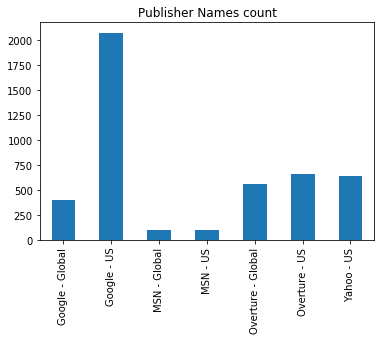

In [14]:
#plt.figure(figsize =(10,8))
dcsheet["Publisher Name"].value_counts().sort_index().plot.bar()
plt.title('Publisher Names count')


Text(0.5, 1.0, 'Average Revenue Per Booking Frequency')

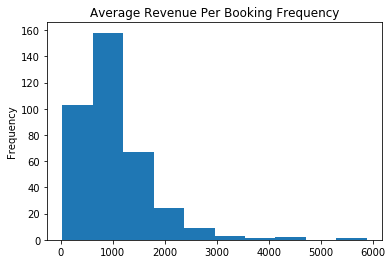

In [15]:
dcsheet['Average Revenue per Booking'].plot.hist()
plt.title('Average Revenue Per Booking Frequency')

## 2)

### Correlation between all variables

In [16]:
cortab=list(['Total Cost','Search Engine Bid','Clicks','Click Charges','Avg. Cost per Click','Impressions','Engine Click Thru %','Avg. Pos.','Total Volume of Bookings','Trans. Conv. %','Total Cost/ Trans.','Amount','Net Revenue','ROA','Average Revenue per Booking','Probability of Booking'])
c2= dcsheet[cortab].corr()
c2

,Total Cost,Search Engine Bid,Clicks,Click Charges,Avg. Cost per Click,Impressions,Engine Click Thru %,Avg. Pos.,Total Volume of Bookings,Trans. Conv. %,Total Cost/ Trans.,Amount,Net Revenue,ROA,Average Revenue per Booking,Probability of Booking
Total Cost,1.000000,0.113212,0.868330,1.000000,0.029171,0.431231,-0.027310,-0.018533,0.539573,-0.000401,0.333614,0.549963,0.482530,0.003013,0.084022,-0.000769
Search Engine Bid,0.113212,1.000000,0.114934,0.113212,0.280368,0.023738,0.147721,-0.267877,0.114730,0.002874,0.039652,0.107165,0.101718,-0.005297,-0.065630,0.008993
Clicks,0.868330,0.114934,1.000000,0.868330,-0.033787,0.400361,-0.014000,-0.021096,0.827187,0.001533,0.192615,0.830764,0.789419,0.015593,0.089506,0.002635
Click Charges,1.000000,0.113212,0.868330,1.000000,0.029171,0.431231,-0.027310,-0.018533,0.539573,-0.000401,0.333614,0.549963,0.482530,0.003013,0.084022,-0.000769
Avg. Cost per Click,0.029171,0.280368,-0.033787,0.029171,1.000000,-0.016912,0.106898,-0.113344,-0.048201,0.003308,0.058178,-0.047568,-0.052634,-0.033836,-0.117778,0.004340
Impressions,0.431231,0.023738,0.400361,0.431231,-0.016912,1.000000,-0.026821,-0.005288,0.092177,-0.001338,0.201258,0.104770,0.069241,-0.000827,0.073082,-0.002120
Engine Click Thru %,-0.027310,0.147721,-0.014000,-0.027310,0.106898,-0.026821,1.000000,-0.221802,0.009194,0.001666,-0.040646,0.008413,0.011397,0.000861,-0.096359,0.028059
Avg. Pos.,-0.018533,-0.267877,-0.021096,-0.018533,-0.113344,-0.005288,-0.221802,1.000000,-0.031914,-0.013475,-0.012189,-0.030424,-0.030160,-0.024858,-0.020293,-0.024613
Total Volume of Bookings,0.539573,0.114730,0.827187,0.539573,-0.048201,0.092177,0.009194,-0.031914,1.000000,0.017679,0.036950,0.994498,0.992108,0.039970,0.058899,0.018974
Trans. Conv. %,-0.000401,0.002874,0.001533,-0.000401,0.003308,-0.001338,0.001666,-0.013475,0.017679,1.000000,-0.000528,0.014417,0.015157,0.856458,-0.026921,0.889333


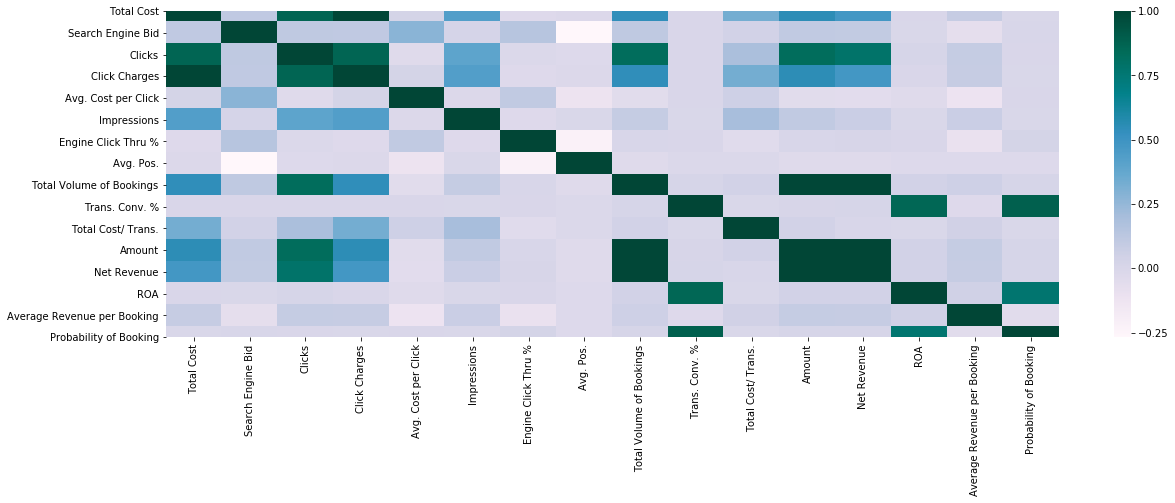

In [17]:
plt.figure(figsize =(20,6))
sns.heatmap(c2,cmap="PuBuGn")

### Original OLS Regressionn without Log Transformation

In [18]:
indvars=sm.add_constant(dcsheet[['Search Engine Bid','Clicks','Total Volume of Bookings']])

C:\Users\chike\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [19]:
regmod=sm.OLS(dcsheet['Total Cost'],indvars)
regfit=regmod.fit()
print(regfit.summary())

                            OLS Regression Results                            
Dep. Variable:             Total Cost   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     8910.
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        17:16:20   Log-Likelihood:                -34515.
No. Observations:                4510   AIC:                         6.904e+04
Df Residuals:                    4506   BIC:                         6.906e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Log transformation was taken as the the first answers gave a warning about scaling as seen above

In [20]:
dcsheet.keys() #for guidance

Index(['Publisher ID', 'Publisher Name', 'Keyword ID', 'Keyword', 'Match Type',
       'Campaign', 'Keyword Group', 'Category', 'Bid Strategy', 'Keyword Type',
       'Status', 'Search Engine Bid', 'Clicks', 'Click Charges',
       'Avg. Cost per Click', 'Impressions', 'Engine Click Thru %',
       'Avg. Pos.', 'Trans. Conv. %', 'Total Cost/ Trans.', 'Amount',
       'Total Cost', 'Total Volume of Bookings', 'Net Revenue', 'ROA',
       'Average Revenue per Booking', 'Probability of Booking'],
      dtype='object')

In [21]:
dcsheet[['Clicks','Impressions']].min()

Clicks         0
Impressions    0
dtype: int64

In [22]:
dcsheet['Log_Clicks'] = np.log(dcsheet['Clicks'])

C:\Users\chike\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [23]:
dcsheet['Log_Clicks']=np.log1p(dcsheet['Clicks'])

In [24]:
dcsheet['Log_Impressions'] = np.log(dcsheet['Impressions'])

In [25]:
dcsheet['Log_Impressions']=np.log1p(dcsheet['Impressions'])

In [26]:
dcsheet.head()

,Publisher ID,Publisher Name,Keyword ID,Keyword,Match Type,Campaign,Keyword Group,Category,Bid Strategy,Keyword Type,...,Total Cost/ Trans.,Amount,Total Cost,Total Volume of Bookings,Net Revenue,ROA,Average Revenue per Booking,Probability of Booking,Log_Clicks,Log_Impressions
0,K2615,Yahoo - US,43000000039657988,fly to florence,Advanced,Western Europe Destinations,Florence,uncategorized,NaN,Unassigned,...,0.256944,8777.95,2.3125,9,8775.6375,379487.027027,975.327778,0.818182,0.693147,2.484907
1,K2615,Yahoo - US,43000000039651113,low international airfare,Advanced,Geo Targeted DC,Low International DC,uncategorized,NaN,Unassigned,...,0.625000,1574.20,0.6250,1,1573.5750,251772.000000,1574.200000,0.166667,0.693147,1.945910
2,K2003,MSN - Global,43000000019452431,air discount france ticket,Broad,Air France Brand & French Destinations,France,uncategorized,Position 2-5 Bid Strategy,Unassigned,...,0.387500,390.15,0.3875,1,389.7625,100583.870968,390.150000,0.111111,0.693147,2.302585
3,K1175,Google - Global,43000000005663331,[airfrance],Exact,Air France Global Campaign,Air France,airfrance,Position 1- 3,Unassigned,...,1.156250,1665.15,2.3125,2,1662.8375,71906.491546,832.575000,0.004988,4.094345,5.996452
4,K1123,Overture - Global,43000000005421354,air france online booking,Standard,Unassigned,Unassigned,airfrance,Position 1-2 Target,Unassigned,...,2.200000,935.00,2.2000,1,932.8000,42400.000000,935.000000,0.003145,2.197225,5.765191


### Correlation Matrix Between our selected Variables

In [27]:
cortab2=list(['Search Engine Bid','Log_Clicks','Clicks','Total Volume of Bookings'])
c3= dcsheet[cortab2].corr()
c3

,Search Engine Bid,Log_Clicks,Clicks,Total Volume of Bookings
Search Engine Bid,1.000000,-0.039096,0.114934,0.114730
Log_Clicks,-0.039096,1.000000,0.374914,0.279083
Clicks,0.114934,0.374914,1.000000,0.827187
Total Volume of Bookings,0.114730,0.279083,0.827187,1.000000


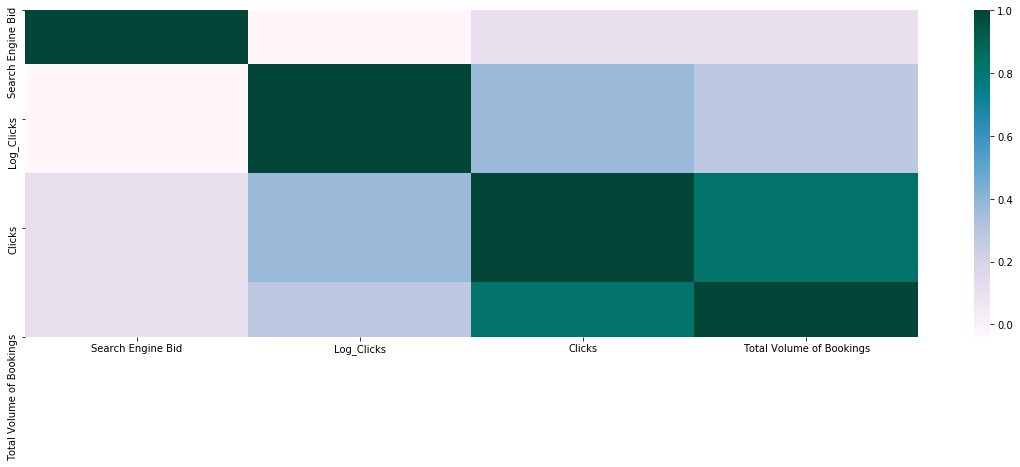

In [28]:
plt.figure(figsize =(20,6))
sns.heatmap(c3,cmap="PuBuGn")

### OLS Regression Analysis

In [29]:
indepvars=sm.add_constant(dcsheet[['Search Engine Bid','Log_Clicks','Total Volume of Bookings']])

In [30]:
regmod=sm.OLS(dcsheet['Total Cost'],indepvars)
regfit=regmod.fit()
print(regfit.summary())

                            OLS Regression Results                            
Dep. Variable:             Total Cost   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     857.5
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        17:16:22   Log-Likelihood:                -37862.
No. Observations:                4510   AIC:                         7.573e+04
Df Residuals:                    4506   BIC:                         7.576e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

# BONUS QUESTIONS

### Summarize metrics for each publisher. 
#### Please report the summary table includingthe variables as shown below (The answer for Google-global is already provided, and please fill-in others.) 
* publisher Name

* Sum of Net Revenue

* Average Cost Per Click

* Total Volume of Bookings

* Average Revenue Per Booking

* ROA

* Probability of Booking

* Sum of Click Charges

* Cost/Booking

Google - Global 

* $808,603 

* $1.66 

* 797 

* $1,166

* 669% 

* 0.0441% 

* $120,947 

* $151.75


In [31]:
dcsheet.columns

Index(['Publisher ID', 'Publisher Name', 'Keyword ID', 'Keyword', 'Match Type',
       'Campaign', 'Keyword Group', 'Category', 'Bid Strategy', 'Keyword Type',
       'Status', 'Search Engine Bid', 'Clicks', 'Click Charges',
       'Avg. Cost per Click', 'Impressions', 'Engine Click Thru %',
       'Avg. Pos.', 'Trans. Conv. %', 'Total Cost/ Trans.', 'Amount',
       'Total Cost', 'Total Volume of Bookings', 'Net Revenue', 'ROA',
       'Average Revenue per Booking', 'Probability of Booking', 'Log_Clicks',
       'Log_Impressions'],
      dtype='object')

In [32]:
pd.pivot_table(dcsheet,index=["Publisher Name"],aggfunc=np.sum)

,Amount,Average Revenue per Booking,Avg. Cost per Click,Avg. Pos.,Click Charges,Clicks,Engine Click Thru %,Impressions,Keyword ID,Log_Clicks,Log_Impressions,Net Revenue,Probability of Booking,ROA,Search Engine Bid,Total Cost,Total Cost/ Trans.,Total Volume of Bookings,Trans. Conv. %
Publisher Name,,,,,,,,,,,,,,,,,,,
Google - Global,929549.80,87202.810029,874.409053,600.434129,120946.711971,72895,3534.832560,1808326,1.689900e+19,1076.946645,2243.251375,8.086031e+05,0.179334,184333.771453,2552.5000,120946.711971,27862.313379,797,170.037009
Google - US,1745481.80,121842.708061,4937.143388,3899.292193,353640.598920,192109,31250.862871,3855689,8.905300e+19,4295.146340,9420.186031,1.391841e+06,1.568593,253043.395083,13975.3125,353640.598920,52017.065255,1550,859.048175
MSN - Global,145524.25,12388.904156,213.146822,176.683655,12160.362438,11217,726.224884,139979,4.257000e+18,220.325892,518.269723,1.333639e+05,0.124224,105426.939183,0.0000,12160.362438,1105.415869,129,112.201563
MSN - US,181549.80,8468.220414,281.012068,172.362044,16098.487407,10808,809.825062,170120,4.214000e+18,225.033503,515.566673,1.654513e+05,0.053506,11572.559630,0.0000,16098.487407,505.456018,140,71.683550
Overture - Global,430084.70,50682.923353,445.031643,1066.630917,64295.862144,60899,1961.968457,17898727,2.377900e+19,1311.149824,3597.223323,3.657888e+05,0.047681,248001.653633,2641.8000,64295.862144,9107.190341,372,130.347708
Overture - US,347433.25,54326.464946,504.951489,1651.034823,141976.074456,119323,1766.751438,17062488,2.842300e+19,1678.202085,4330.940686,2.054572e+05,0.042853,80387.926970,1350.6625,141976.074456,28859.714386,289,62.725412
Yahoo - US,882288.95,42015.465690,1269.286042,1136.237388,46197.824620,45598,10197.476850,933345,2.730500e+19,1051.694299,2690.224645,8.360911e+05,1.054891,657010.278741,3989.9125,46197.824620,5052.422226,662,1161.296968


#### Sum of Net Revenue and Total Volume of Bookings

In [33]:
pd.pivot_table(dcsheet,index=["Publisher Name"],
               values=['Net Revenue', 'Total Volume of Bookings'],aggfunc=np.sum)

,Net Revenue,Total Volume of Bookings
Publisher Name,,
Google - Global,8.086031e+05,797
Google - US,1.391841e+06,1550
MSN - Global,1.333639e+05,129
MSN - US,1.654513e+05,140
Overture - Global,3.657888e+05,372
Overture - US,2.054572e+05,289
Yahoo - US,8.360911e+05,662


#### Average Cost Per Click

In [173]:
dcsheet.groupby(by=['Publisher Name']).pipe(lambda group: group['Click Charges'].sum()/group['Clicks'].
                                            sum())

Publisher Name
Google - Global      1.659191
Google - US          1.840833
MSN - Global         1.084101
MSN - US             1.489497
Overture - Global    1.055779
Overture - US        1.189847
Yahoo - US           1.013155
dtype: float64

#### Average Revenue Per Booking

In [174]:
dcsheet.groupby(by=['Publisher Name']).pipe(lambda group: group['Amount'].sum()/group['Total Volume of Bookings'].
                                            sum())

Publisher Name
Google - Global      1166.310916
Google - US          1126.117290
MSN - Global         1128.094961
MSN - US             1296.784286
Overture - Global    1156.141667
Overture - US        1202.191176
Yahoo - US           1332.762764
dtype: float64

#### Click Charges

In [36]:
pd.pivot_table(dcsheet,index=["Publisher Name"],values=['Click Charges'],aggfunc=np.sum)

,Click Charges
Publisher Name,
Google - Global,120946.711971
Google - US,353640.598920
MSN - Global,12160.362438
MSN - US,16098.487407
Overture - Global,64295.862144
Overture - US,141976.074456
Yahoo - US,46197.824620


#### Probability of Booking

In [223]:
#dcsheet['Probability of Booking'] = (dcsheet['Engine Click Thru %']*dcsheet['Trans. Conv. %'])/ 10000
dcsheet.groupby(by=['Publisher Name']).pipe(lambda group: group['Engine Click Thru %'].mean()*group['Trans. Conv. %'].
                                            mean())/10000

Publisher Name
Google - Global      0.000389
Google - US          0.000626
MSN - Global         0.000831
MSN - US             0.000604
Overture - Global    0.000084
Overture - US        0.000025
Yahoo - US           0.002937
dtype: float64

#### Cost/Booking

In [146]:
dcsheet.groupby(by=['Publisher Name']).pipe(lambda group: group['Click Charges'].sum()/group['Total Volume of Bookings'].
                                            sum())


Publisher Name
Google - Global      151.752462
Google - US          228.155225
MSN - Global          94.266375
MSN - US             114.989196
Overture - Global    172.838339
Overture - US        491.266694
Yahoo - US            69.785234
dtype: float64

### ROA

In [165]:
dcsheet.groupby(by=['Publisher Name']).pipe(lambda group: group['Net Revenue'].sum()/group['Total Cost'].
                                            sum())*100

Publisher Name
Google - Global       668.561447
Google - US           393.575060
MSN - Global         1096.709808
MSN - US             1027.744461
Overture - Global     568.915052
Overture - US         144.712534
Yahoo - US           1809.806267
dtype: float64

In [232]:
dcsheet.groupby(by=['Publisher Name']).apply(lambda group: group['Net Revenue'].sum()/group['Total Cost'].
                                            sum())*100

Publisher Name
Google - Global       668.561447
Google - US           393.575060
MSN - Global         1096.709808
MSN - US             1027.744461
Overture - Global     568.915052
Overture - US         144.712534
Yahoo - US           1809.806267
dtype: float64

## 2) Based on the one-week summary data provided for Kayak in “kayak” sheet of the excel file, please calculate the following metrics and clearly show your calculation process.
- a. Kayak Trans. Conv. Rate
- b. Average Publisher TCR
- c. Kayak CPC
- d. Average Publisher CPC

#### Compare the calculations with what you have derived from the Bonus question #1, what recommendation you would like to make about marketing in Kayak relative to other publishers?

In [41]:
dkay = pd.read_excel(dcdata, 'Kayak',header=7)

In [42]:
a=(dkay[:1])
a

,Unnamed: 0,Search Engine,Clicks,Media Cost,Total Bookings,Avg Ticket,Total Revenue,Net Revenue
0,NaN,Kayak,2839.0,3567.1335,208.0,1123.528846,233694.0,230126.8665


#### a. Kayak Trans. Conv. Rate

In [43]:
dkay['Kayak Trans. Conv. Rate'] = (dkay['Total Bookings']/dkay['Clicks'])*100

#### b. Average Publisher TCR

In [44]:
ATCR= dcsheet["Trans. Conv. %"].mean()
ATCR

0.5692550746242099

#### c. Kayak CPC

In [45]:
dkay['Kayak CPC'] = (dkay['Media Cost']/dkay['Clicks'])

#### d. Average Publisher CPC

In [46]:
ACPC = dcsheet['Avg. Cost per Click'].mean()
ACPC

1.8902395796868083

In [47]:
dkay.head()

,Unnamed: 0,Search Engine,Clicks,Media Cost,Total Bookings,Avg Ticket,Total Revenue,Net Revenue,Kayak Trans. Conv. Rate,Kayak CPC
0,NaN,Kayak,2839.0,3567.1335,208.0,1123.528846,233694.0,230126.8665,7.326523,1.256475
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Time Period is One Week (6/04/07 - 6/10/07),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Summarized Calculations

In [48]:
dkay[:1][['Kayak Trans. Conv. Rate','Kayak CPC']]

,Kayak Trans. Conv. Rate,Kayak CPC
0,7.326523,1.256475


In [49]:
print('Average Publisher TCR:',ATCR) 
print('Average Publisher CPC:',ACPC) 


Average Publisher TCR: 0.5692550746242099
Average Publisher CPC: 1.8902395796868083
